# A304_SRO_NGO_Hall_100K_p1T_to_n1T

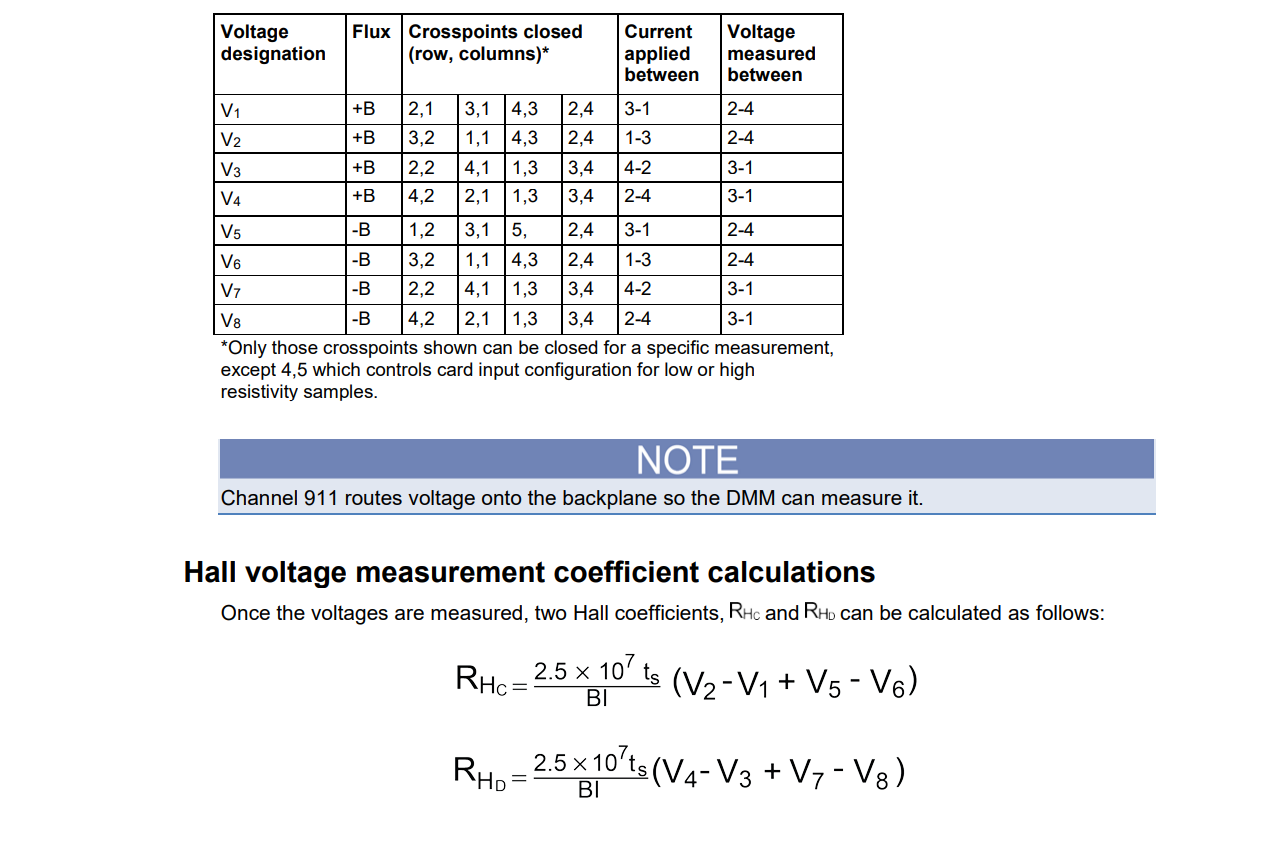

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [120]:
filename='C:\\Users\\Admin\\Desktop\\Data\\5_june_2023\\A304_SRO_NGO_Hall_100K_p1T_n1T.csv'
df = pd.read_csv(filename, names=["I", "B","T", "V1", "V2", "V3", "V4",'Rel_value'])
df['multiplier'] = 10**6
df
# NEED TO ADD MULITPLIER IN THE LABVIEW CODE

I             B           T          V1          V2          V3  \
0   0.001      0.132254  100.100065  493.522386 -493.415593 -457.563612   
1   0.001    500.098538  100.000411  491.792471 -491.809999 -459.457023   
2   0.001   1000.338312   99.999294  489.272841 -489.223367 -462.358599   
3   0.001   1500.503760   99.999838  484.777325 -484.663044 -466.920764   
4   0.001   2000.455420  100.000075  476.783395 -476.579026 -474.314169   
..    ...           ...         ...         ...         ...         ...   
78  0.001   6000.271484  100.000202  415.042231 -415.035439 -515.272325   
79  0.001   7000.455273  100.000580  412.491897 -412.471725 -514.901633   
80  0.001   8000.274414  100.000669  410.280794 -410.265934 -514.301994   
81  0.001   9000.441992  100.000336  408.218722 -408.194881 -513.627247   
82  0.001  10000.318896  100.000508  406.192388 -406.190085 -512.944902   

            V4     Rel_value  multiplier  
0   457.530978  7.993000e-07     1000000  
1   459.481558  7.489000e-07     1000000  
2   462.410471  7.295000e-07     1000000  
3   467.007665  7.262000e-07     1000000  
4   474.435957  7.085000e-07     1000000  
..         ...           ...         ...  
78  515.313929  6.416000e-07     1000000  
79  514.944063  6.382000e-07     1000000  
80  514.344099  6.248000e-07     1000000  
81  513.682166  6.193000e-07     1000000  
82  512.994947  6.046000e-07     1000000  

[83 rows x 9 columns]

In [121]:
df['V1'] = -1*df['V1']
df['V2'] = -1*df['V2']
df['V3'] = -1*df['V3']
df['V4'] = -1*df['V4']

### Converting B to integer B

In [122]:
def round_fun(a):
    step = 500
    if a > 0 : q = int((a+1)/step)
    else : q = int((a-1)/step)
    return q*step

df['B_int'] = list(map(round_fun,df['B'].values))
df = df[['I', 'B', 'B_int', 'T', 'V1', 'V2', 'V3', 'V4', 'Rel_value', 'multiplier']].copy()

In [123]:
df.head()

I            B  B_int           T          V1          V2          V3  \
0  0.001     0.132254      0  100.100065 -493.522386  493.415593  457.563612   
1  0.001   500.098538    500  100.000411 -491.792471  491.809999  459.457023   
2  0.001  1000.338312   1000   99.999294 -489.272841  489.223367  462.358599   
3  0.001  1500.503760   1500   99.999838 -484.777325  484.663044  466.920764   
4  0.001  2000.455420   2000  100.000075 -476.783395  476.579026  474.314169   

           V4     Rel_value  multiplier  
0 -457.530978  7.993000e-07     1000000  
1 -459.481558  7.489000e-07     1000000  
2 -462.410471  7.295000e-07     1000000  
3 -467.007665  7.262000e-07     1000000  
4 -474.435957  7.085000e-07     1000000

In [124]:
data_temp = df.copy()
data_temp['R1'] = df['V1']/(df['multiplier']*df['I'])
data_temp['R2'] = df['V2']/(df['multiplier']*df['I'])
data_temp['R3'] = df['V3']/(df['multiplier']*df['I'])
data_temp['R4'] = df['V4']/(df['multiplier']*df['I'])

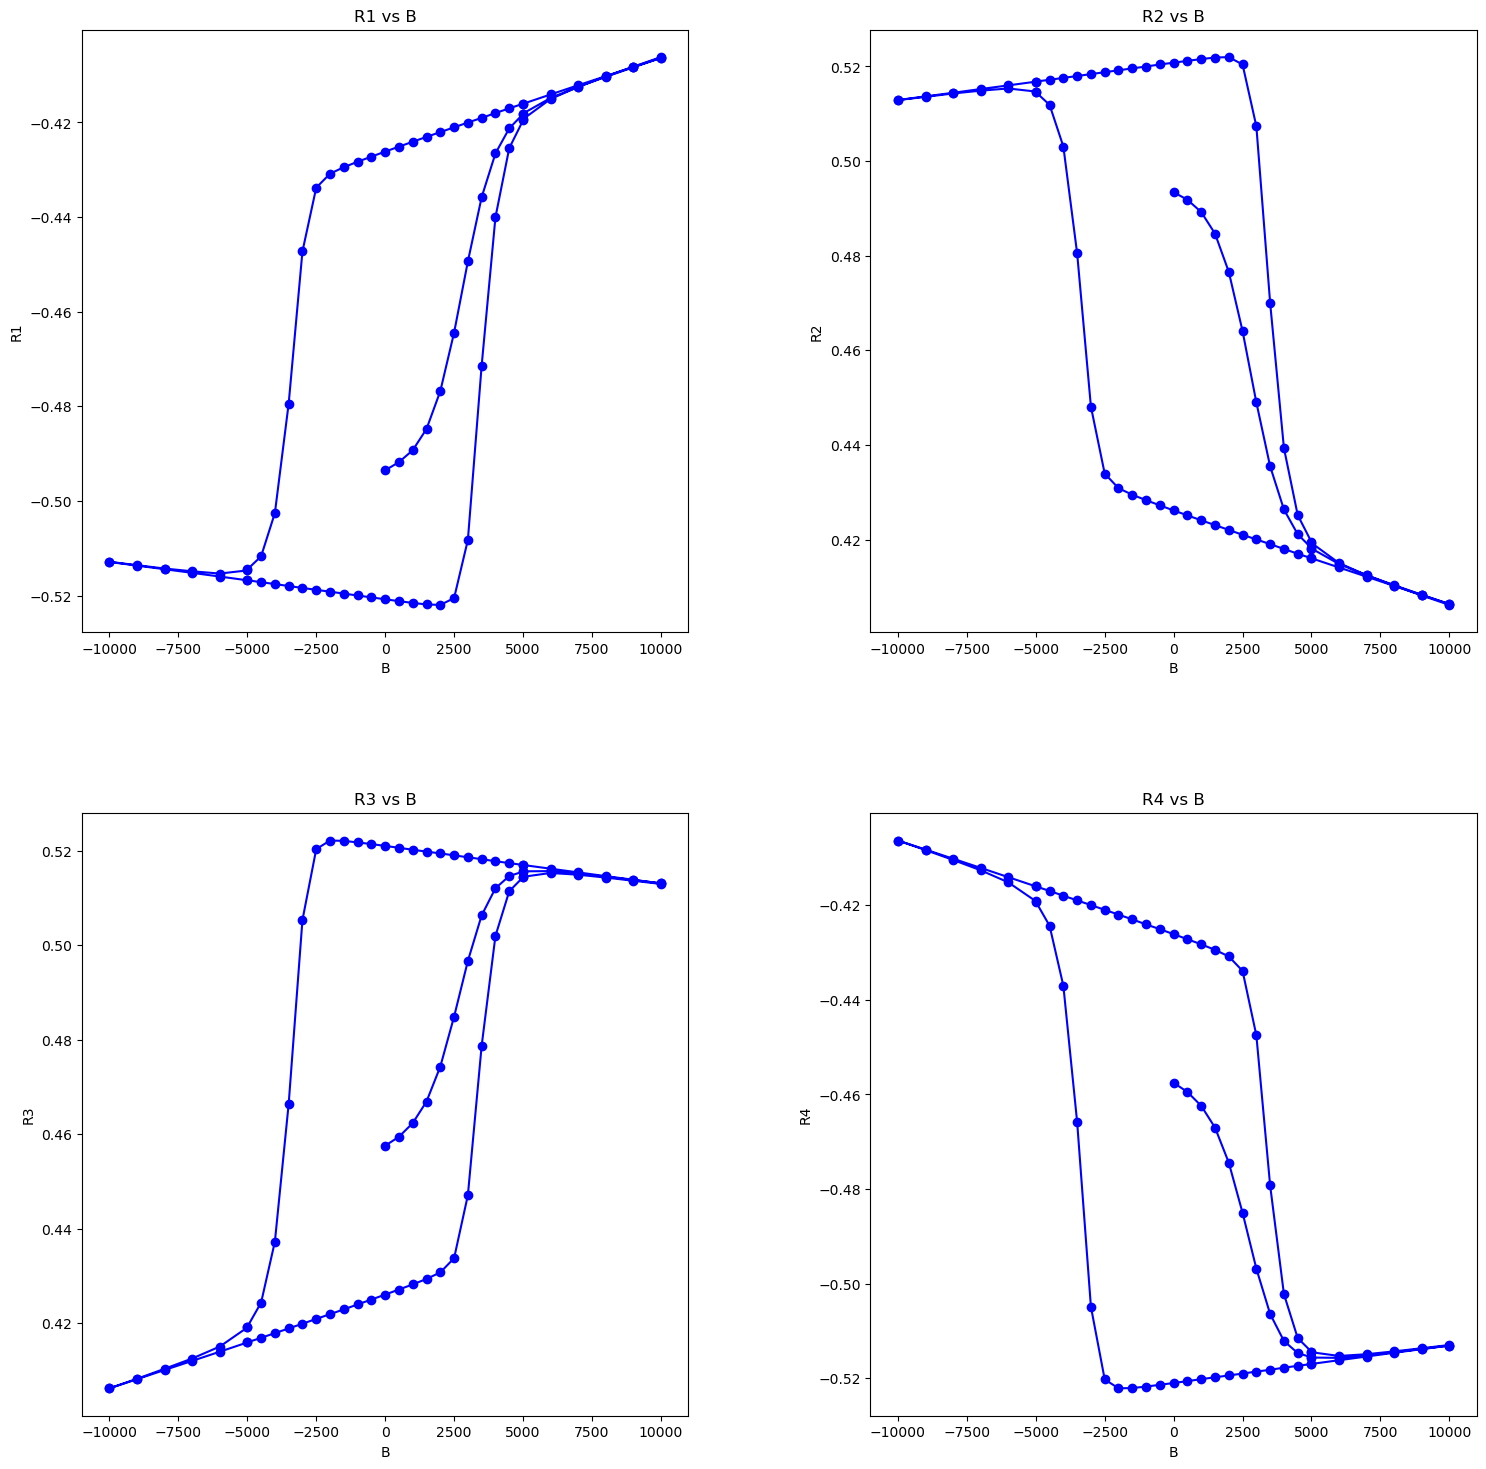

In [125]:
plt.figure(figsize=(18,18))
plt.subplot(2,2,1)
plt.plot(data_temp['B'],data_temp['R1'], 'bo-')
plt.title('R1 vs B')
plt.ylabel('R1')
plt.xlabel('B')
plt.subplot(2,2,2)
plt.plot(data_temp['B'],data_temp['R2'], 'bo-')
plt.title('R2 vs B')
plt.ylabel('R2')
plt.xlabel('B')
plt.subplot(2,2,3)
plt.plot(data_temp['B'],data_temp['R3'], 'bo-')
plt.title('R3 vs B')
plt.ylabel('R3')
plt.xlabel('B')
plt.subplot(2,2,4)
plt.plot(data_temp['B'],data_temp['R4'], 'bo-')
plt.title('R4 vs B')
plt.ylabel('R4')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
plt.show()

### Truncating intial data (0 to 1 T)

In [126]:
B_max = max(df['B_int'])
B_max_first_idx = 0
for i in range(len(df)):
    if df.iloc[i].B_int == B_max:
        B_max_first_idx = i
        break
B_max_first_idx

16

In [127]:
df = df.iloc[B_max_first_idx+1:].copy()
data.reset_index(inplace = True, drop = True) # resetting index

## Spliting data into two subset (increasing and decreasing of magnetic field)

B_max to B_min --> Decreasing

B_min to B_max --> increasing


In [128]:
B_max = max(df['B_int'])
B_min = min(df['B_int'])
print(B_max, B_min)

10000 -10000


In [129]:
# finding index of first appearance of B_min
B_min_first_idx = 0
for i in range(len(df)):
    if df.iloc[i].B_int == B_min:
        B_min_first_idx = i
        break
B_min_first_idx

32

In [130]:
# now split it into two data set
df_dec = df.iloc[0:B_min_first_idx+1].copy()
df_inc = df.iloc[B_min_first_idx+1:].copy()

In [131]:
df_dec.head()

I             B  B_int           T          V1          V2  \
17  0.001  10000.456250  10000  100.000256 -406.354094  406.361619   
18  0.001   9000.474023   9000  100.000073 -408.281749  408.291774   
19  0.001   8000.352002   8000  100.000089 -410.220622  410.208905   
20  0.001   7000.479053   7000  100.000508 -412.137121  412.157964   
21  0.001   6000.490186   6000  100.000628 -414.089070  414.102789   

            V3          V4     Rel_value  multiplier  
17  513.077214 -513.114062  7.223000e-07     1000000  
18  513.838162 -513.875331  7.238000e-07     1000000  
19  514.603350 -514.636023  7.324000e-07     1000000  
20  515.393029 -515.431267  7.218000e-07     1000000  
21  516.176497 -516.213955  7.216000e-07     1000000

In [132]:
df_inc.head()

I             B  B_int           T          V1          V2  \
50  0.001 -10000.278174 -10000  100.000111 -512.888982  512.882277   
51  0.001  -9000.342627  -9000  100.000479 -513.663760  513.667463   
52  0.001  -8000.206689  -8000  100.000116 -514.428767  514.424076   
53  0.001  -7000.377026  -7000  100.000038 -515.194728  515.211816   
54  0.001  -6000.409302  -6000  100.000062 -515.972644  515.986580   

            V3          V4     Rel_value  multiplier  
50  406.237809 -406.294054  6.677000e-07     1000000  
51  408.171889 -408.205093  6.686000e-07     1000000  
52  410.118843 -410.141309  6.740000e-07     1000000  
53  412.044664 -412.078983  6.748000e-07     1000000  
54  413.980344 -414.036250  6.727000e-07     1000000

In [133]:
df_dec.drop_duplicates(subset='B_int', keep='first', inplace=True) # remove duplicates
df_inc.drop_duplicates(subset='B_int', keep='first', inplace=True) # remove duplicates

## Creating decreasing Field data

In [134]:
data = pd.merge(df_dec.assign(key=1), df_inc.assign(key=1), on='key').drop('key', axis=1) # cross product

data = data[data['B_int_x'] == -1*data['B_int_y']] # selecting 
data = data[['I_x','B_int_x','T_x','V1_x','V2_x','V3_x','V4_x','V1_y','V2_y','V3_y','V4_y','multiplier_x']].copy() # req coloumns

data.rename({'I_x' : 'I', 'B_int_x' : 'B', 'T_x' : 'T', 'V1_x' : 'V1', 'V2_x' : 'V2', 'V3_x' : 'V3', 'V4_x' : 'V4', 'V1_y' : 'V5', 'V2_y' : 'V6', 'V3_y' : 'V7', 'V4_y' : 'V8', 'multiplier_x' : 'multiplier'}, axis=1, inplace=True)
data.reset_index(inplace = True, drop = True) # resetting index
data.head()

I      B           T          V1          V2          V3          V4  \
0  0.001  10000  100.000256 -406.354094  406.361619  513.077214 -513.114062   
1  0.001   9000  100.000073 -408.281749  408.291774  513.838162 -513.875331   
2  0.001   8000  100.000089 -410.220622  410.208905  514.603350 -514.636023   
3  0.001   7000  100.000508 -412.137121  412.157964  515.393029 -515.431267   
4  0.001   6000  100.000628 -414.089070  414.102789  516.176497 -516.213955   

           V5          V6          V7          V8  multiplier  
0 -512.888982  512.882277  406.237809 -406.294054     1000000  
1 -513.663760  513.667463  408.171889 -408.205093     1000000  
2 -514.428767  514.424076  410.118843 -410.141309     1000000  
3 -515.194728  515.211816  412.044664 -412.078983     1000000  
4 -515.972644  515.986580  413.980344 -414.036250     1000000

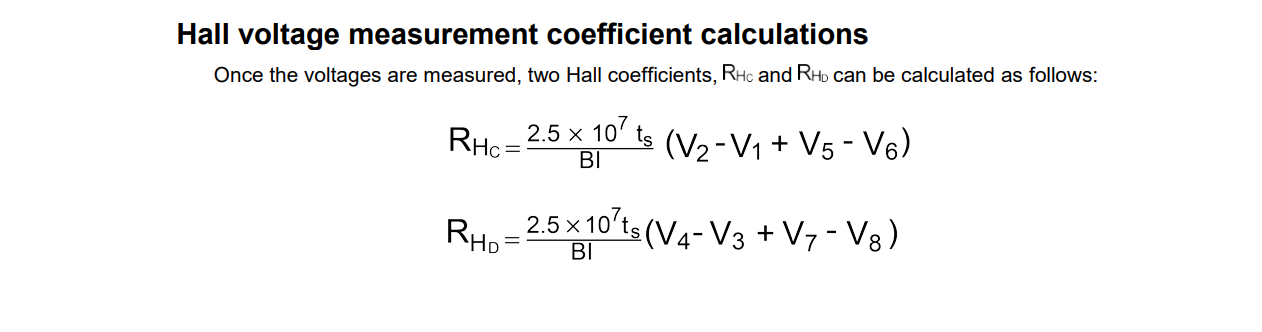
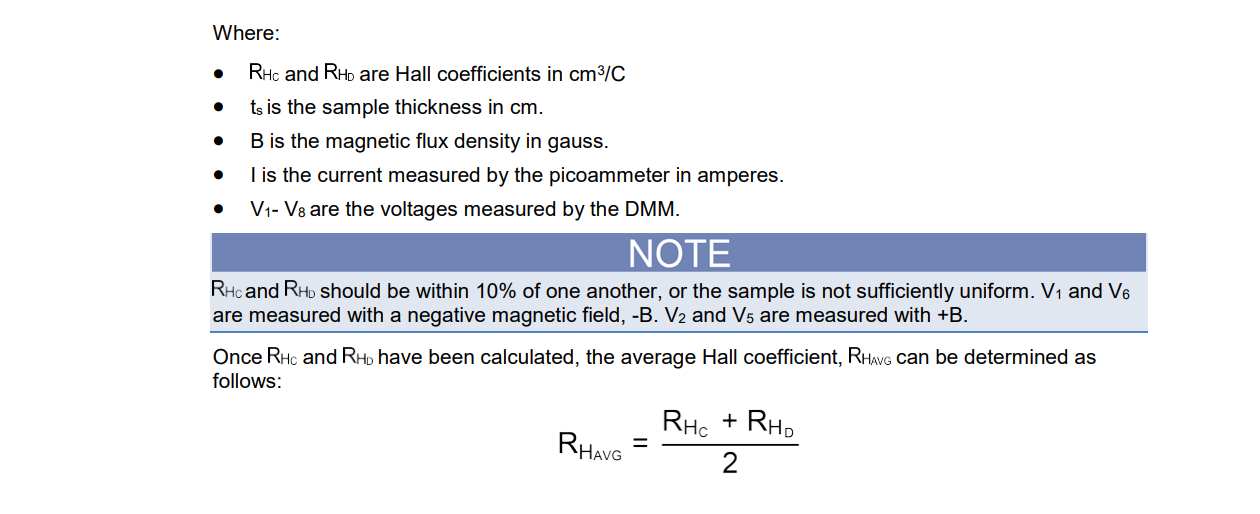

## Note : Here RHc & RHd we computed is Hall resistance, not Hall coefficients.

In [135]:
data['RHc'] = (data['V2'] - data['V1'] + data['V5'] - data['V6'])/(data['I']*data['multiplier'])
data['RHd'] = (data['V4'] - data['V3'] + data['V7'] - data['V8'])/(data['I']*data['multiplier'])
data['R'] = (data['RHc'] + data['RHd'])/2

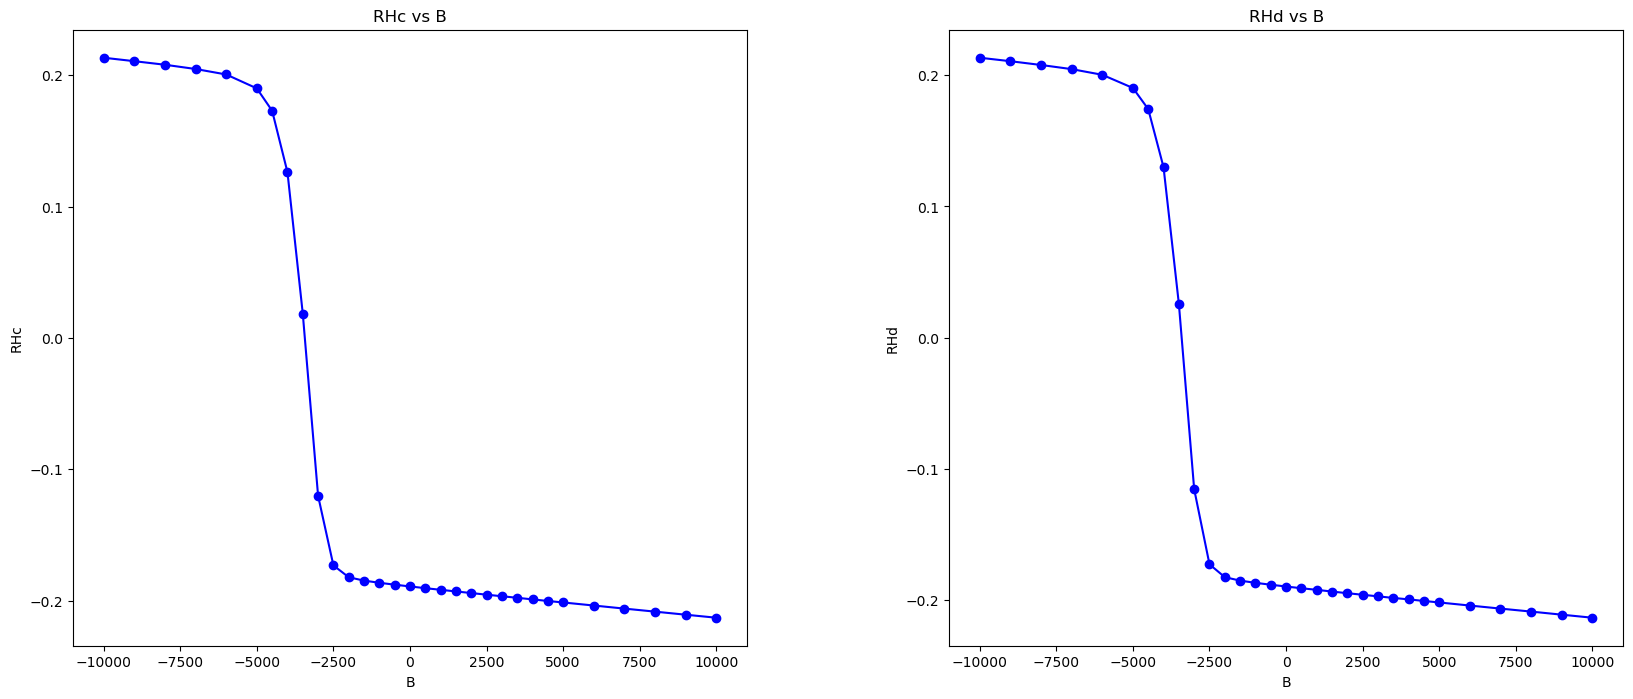

In [136]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(data['B'],data['RHc'],'bo-')
plt.title('RHc vs B')
plt.ylabel('RHc')
plt.xlabel('B')
plt.subplot(1,2,2)
plt.plot(data['B'],data['RHd'],'bo-')
plt.title('RHd vs B')
plt.ylabel('RHd')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0, wspace = 0.3)
plt.show()

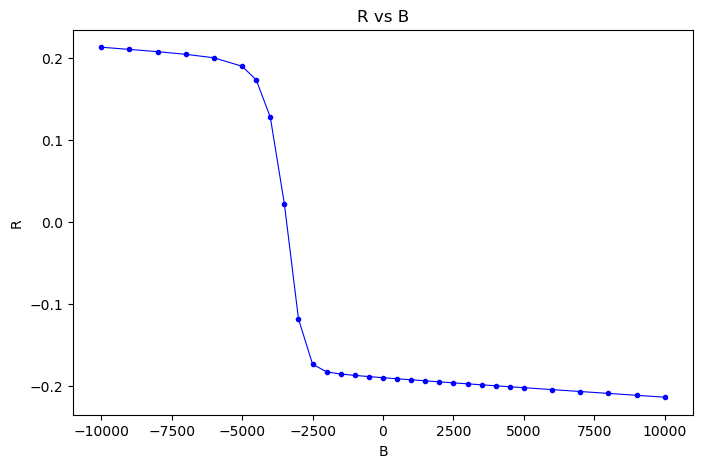

In [137]:
plt.figure(figsize=(8,5))
plt.plot(data['B'],data['R'],'bo-', linewidth=0.8, markersize=3)
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.show()

## Creating Increasing Field data

In [138]:
data2 = pd.merge(df_inc.assign(key=1), df_dec.assign(key=1), on='key').drop('key', axis=1) # cross product

data2 = data2[data2['B_int_x'] == -1*data2['B_int_y']] # selecting 
data2 = data2[['I_x','B_int_x','T_x','V1_x','V2_x','V3_x','V4_x','V1_y','V2_y','V3_y','V4_y','multiplier_x']].copy() # req coloumns

data2.rename({'I_x' : 'I', 'B_int_x' : 'B', 'T_x' : 'T', 'V1_x' : 'V1', 'V2_x' : 'V2', 'V3_x' : 'V3', 'V4_x' : 'V4', 'V1_y' : 'V5', 'V2_y' : 'V6', 'V3_y' : 'V7', 'V4_y' : 'V8', 'multiplier_x' : 'multiplier'}, axis=1, inplace=True)
data2.reset_index(inplace = True, drop = True) # resetting index
data2.head()

I      B           T          V1          V2          V3          V4  \
0  0.001 -10000  100.000111 -512.888982  512.882277  406.237809 -406.294054   
1  0.001  -9000  100.000479 -513.663760  513.667463  408.171889 -408.205093   
2  0.001  -8000  100.000116 -514.428767  514.424076  410.118843 -410.141309   
3  0.001  -7000  100.000038 -515.194728  515.211816  412.044664 -412.078983   
4  0.001  -6000  100.000062 -515.972644  515.986580  413.980344 -414.036250   

           V5          V6          V7          V8  multiplier  
0 -406.354094  406.361619  513.077214 -513.114062     1000000  
1 -408.281749  408.291774  513.838162 -513.875331     1000000  
2 -410.220622  410.208905  514.603350 -514.636023     1000000  
3 -412.137121  412.157964  515.393029 -515.431267     1000000  
4 -414.089070  414.102789  516.176497 -516.213955     1000000

### Hall resistance calculation

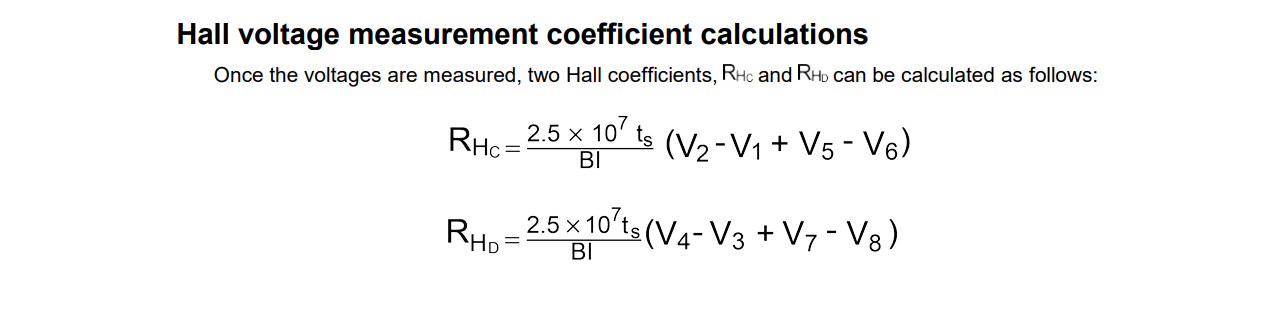

## Note : Here RHc & RHd we computed is Hall resistance, not Hall coefficients.

In [139]:
data2['RHc'] = (data2['V2'] - data2['V1'] + data2['V5'] - data2['V6'])/(data2['I']*data2['multiplier'])
data2['RHd'] = (data2['V4'] - data2['V3'] + data2['V7'] - data2['V8'])/(data2['I']*data2['multiplier'])

data2['R'] = (data2['RHc'] + data2['RHd'])/2

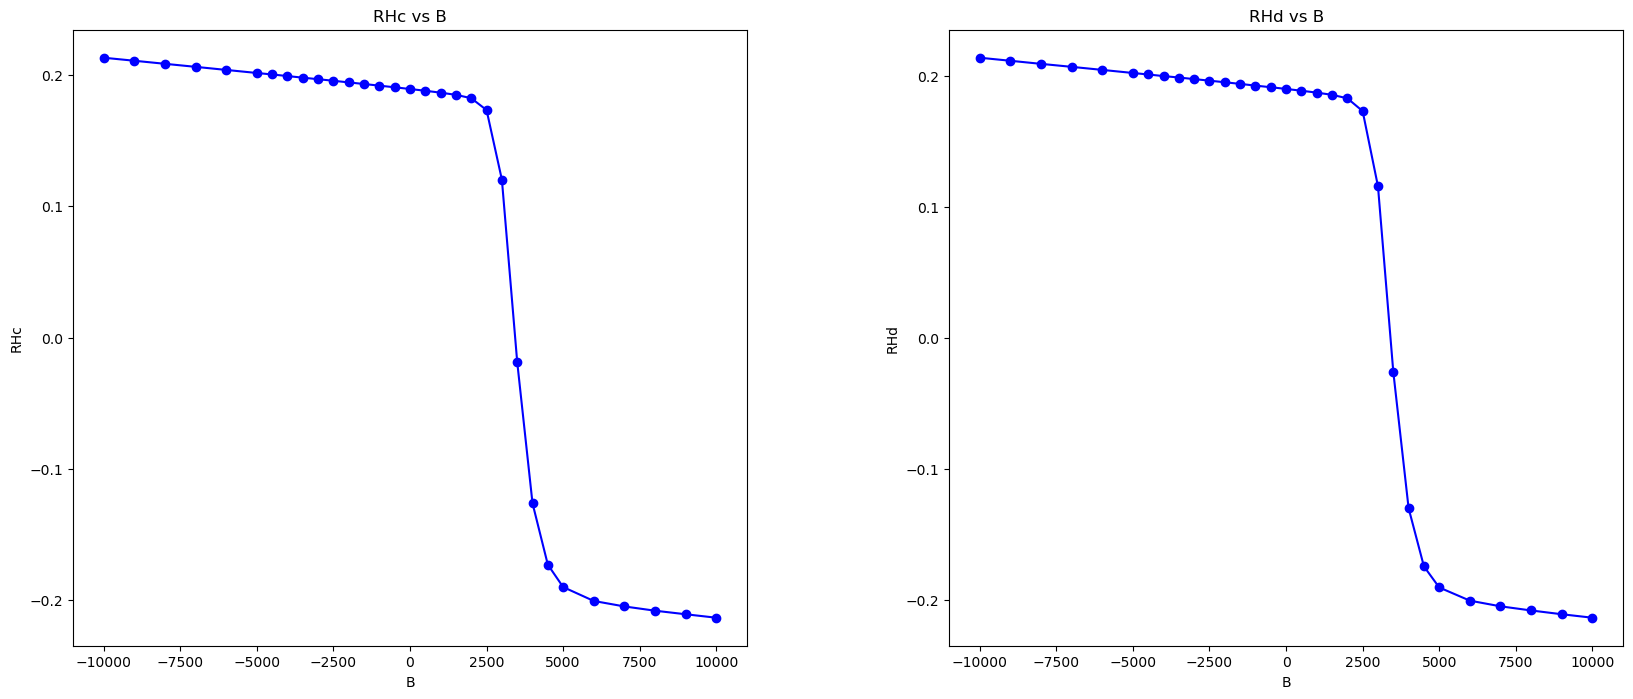

In [140]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(data2['B'],data2['RHc'],'bo-')
plt.title('RHc vs B')
plt.ylabel('RHc')
plt.xlabel('B')
plt.subplot(1,2,2)
plt.plot(data2['B'],data2['RHd'],'bo-')
plt.title('RHd vs B')
plt.ylabel('RHd')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0, wspace = 0.3)
plt.show()

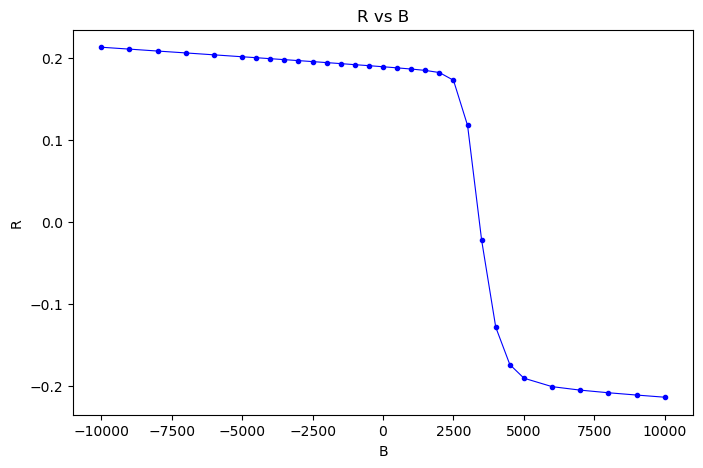

In [141]:
plt.figure(figsize=(8,5))
plt.plot(data2['B'],data2['R'],'bo-', linewidth=0.8, markersize=3)
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.show()

## Plotting on same graph

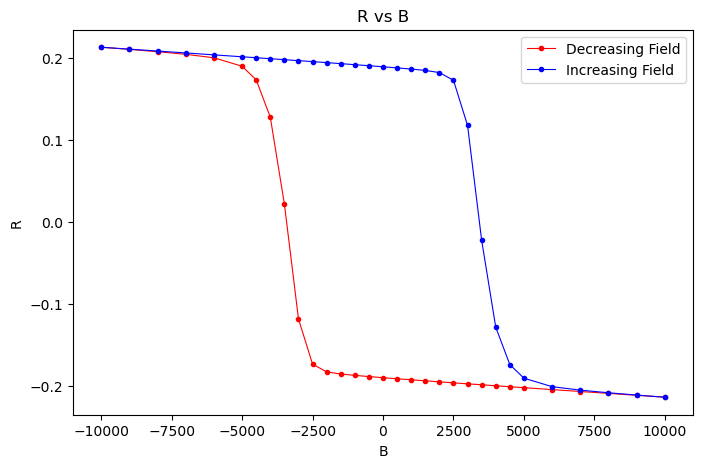

In [142]:
plt.figure(figsize=(8,5))
plt.plot(data['B'], data['R'], 'ro-', linewidth=0.8, markersize=3, label = 'Decreasing Field')
plt.plot(data2['B'],data2['R'],'bo-', linewidth=0.8, markersize=3, label = 'Increasing Field')
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.legend()
plt.show()

## Comparison with old data

In [143]:
# Load old data
data_dec_old = pd.read_pickle('./pickle_data/100K_dec_old.pkl')
data_inc_old = pd.read_pickle('./pickle_data/100K_inc_old.pkl')

### plotting on same plot

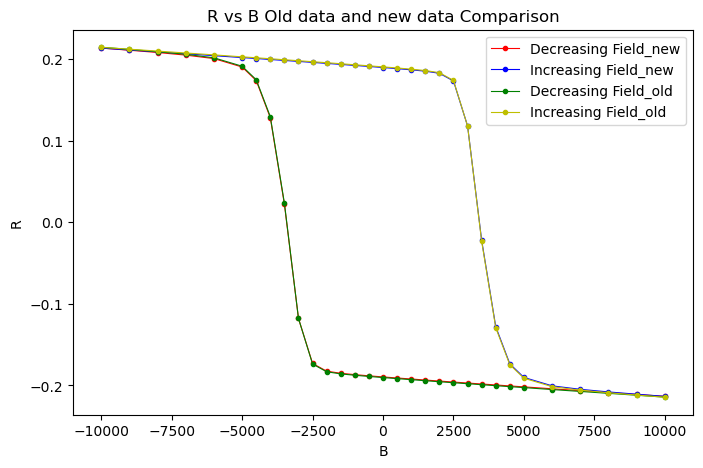

In [144]:
plt.figure(figsize=(8,5))
plt.plot(data['B'], data['R'], 'ro-', linewidth=0.8, markersize=3, label = 'Decreasing Field_new')
plt.plot(data2['B'],data2['R'],'bo-', linewidth=0.8, markersize=3, label = 'Increasing Field_new')
plt.plot(data_dec_old['B'],data_dec_old['R'],'go-', linewidth=0.8, markersize=3, label = 'Decreasing Field_old')
plt.plot(data_inc_old['B'],data_inc_old['R'],'yo-', linewidth=0.8, markersize=3, label = 'Increasing Field_old')

plt.title('R vs B Old data and new data Comparison')
plt.ylabel('R')
plt.xlabel('B')
plt.legend()
plt.show()